<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/MultipleMarketIndexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U finance-dataReader
import FinanceDataReader as fdr
import matplotlib.pyplot as plt


     |████████████████████████████████| 48 kB 2.3 MB/s 


In [11]:
def market_index_graphs(start_date, disp_days, entity):

  if (entity == 'Market'):
      label = ['US500', 'SSEC', 'KS11', 'JP225', 'UK100', 'DE30', 'FCHI', 'HNX30']
  elif (entity == 'Currency Exchange'):
      label = ['USD/KRW', 'CNY/KRW', 'JPY/KRW']
  else:
      print("Input the entity label, either 'Market' or  'Currency Exchange'")
      return
  
  #Retrieve the data
  df_list = {}
  for i, idx in enumerate(label):
    print(i, idx)
    df_list[idx] = df = fdr.DataReader(idx, start_date)

  #Plot
  for i, idx in enumerate(df_list):

    start_date = df_list[idx].index[0]
    disp_date = df_list[idx].index[-1*disp_days]
    end_date = df_list[idx].index[-1]

    print('\n')
    print('Displaying the data from ', start_date, 'to ', end_date, '\n')
    
    fig, ax1 = plt.subplots(figsize=(20, 10))

    h1 = df_list[idx]['Close'][disp_date:]
    h2 = df_list[idx]['Close'][start_date:].rolling(200).mean()
    h3 = df_list[idx]['Close'][start_date:].rolling(50).mean()
    h4 = df_list[idx]['Close'][start_date:].rolling(20).mean()
    h5 = df_list[idx]['Close'][start_date:].rolling(5).mean()
    h1.plot(linewidth=4,color='darkgray', label=idx, marker='o')
    h2[disp_date:].plot(color='orange', linewidth=2, label='200 days ave.')
    h3[disp_date:].plot(color='darkred', linewidth=2, label='50 days ave.')
    h4[disp_date:].plot(color='green', linewidth=2, label='20 days ave.')
    h5[disp_date:].plot(color='blue', linewidth=2, label='5 days ave.')

    plt.title(idx + ' ' + entity + ' Index')
    plt.ylabel('Index')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()
    plt.close()

0 US500
1 SSEC
2 KS11
3 JP225
4 UK100
5 DE30
6 FCHI
7 HNX30


Displaying the data from  2020-01-02 00:00:00 to  2022-03-30 00:00:00 



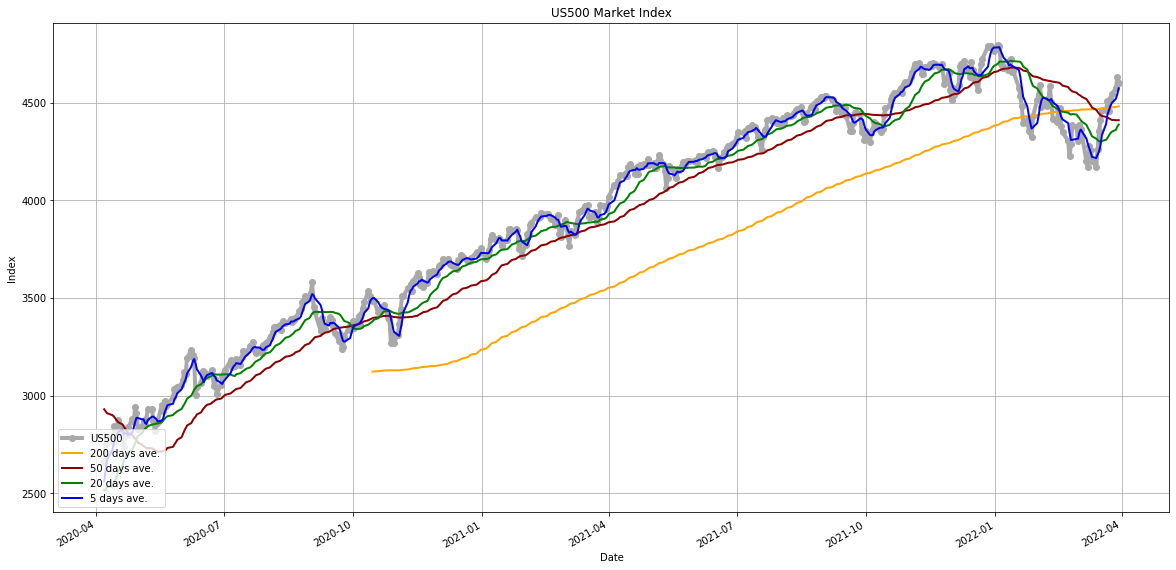



Displaying the data from  2020-01-02 00:00:00 to  2022-03-31 00:00:00 



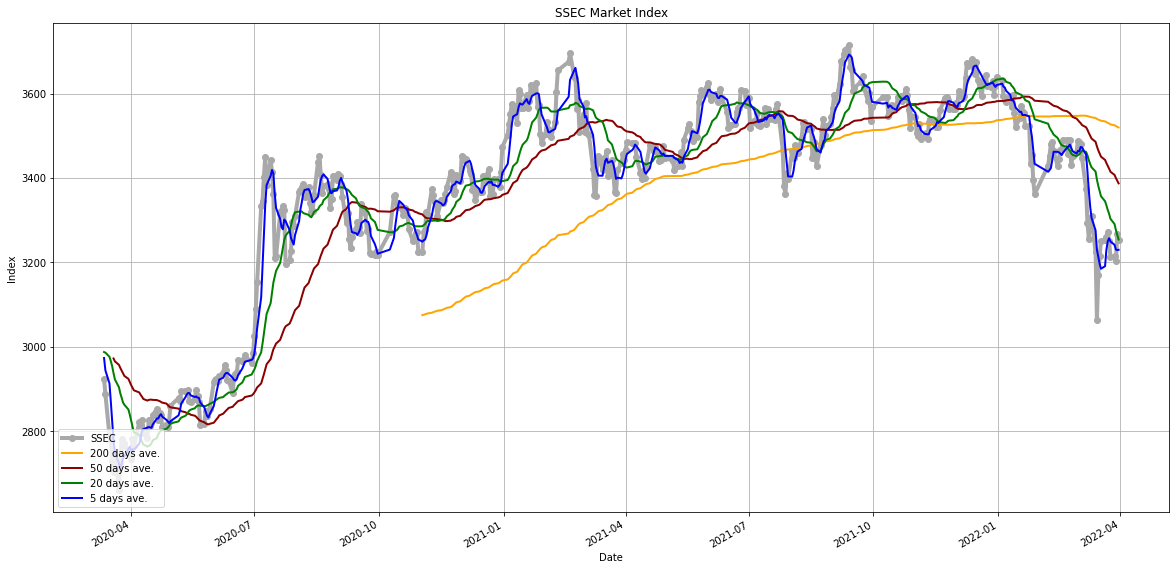



Displaying the data from  2020-01-02 00:00:00 to  2022-03-31 00:00:00 



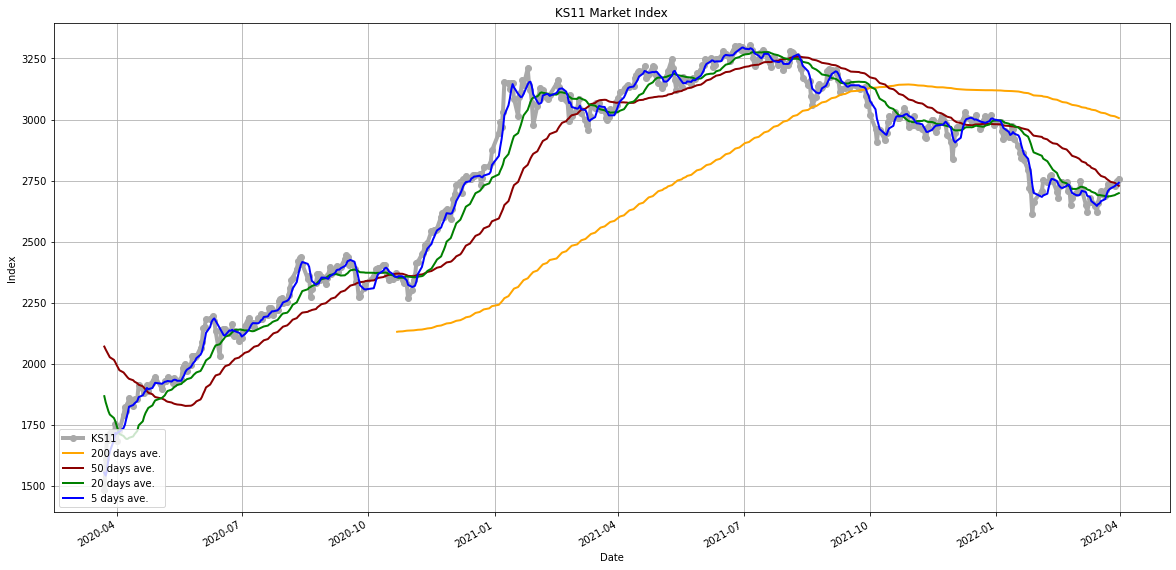



Displaying the data from  2020-01-06 00:00:00 to  2022-03-30 00:00:00 



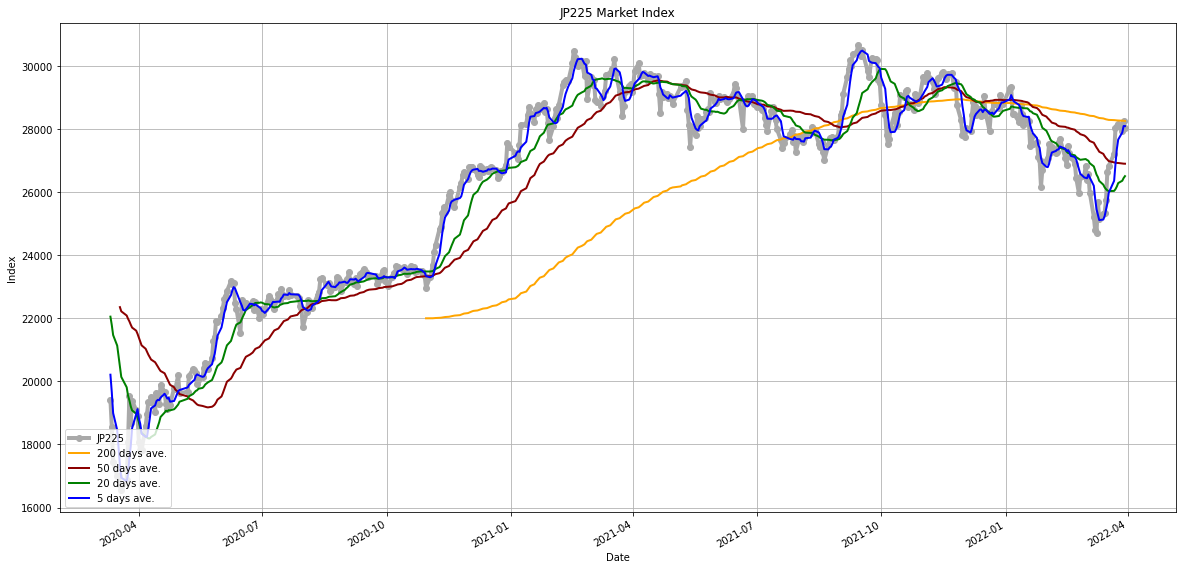



Displaying the data from  2020-01-02 00:00:00 to  2022-03-30 00:00:00 



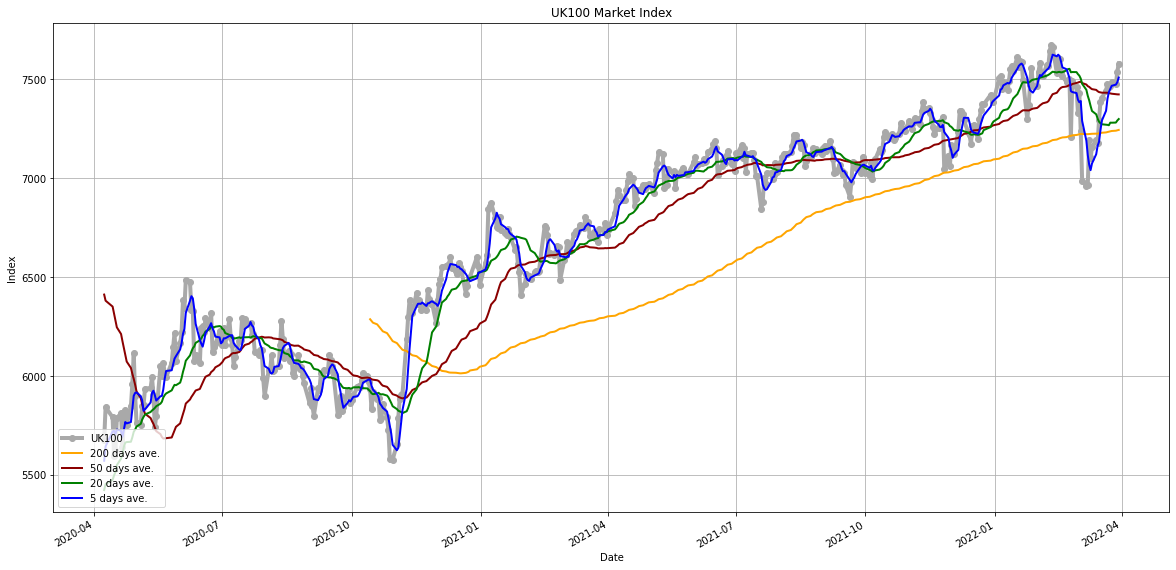



Displaying the data from  2020-01-02 00:00:00 to  2022-03-30 00:00:00 



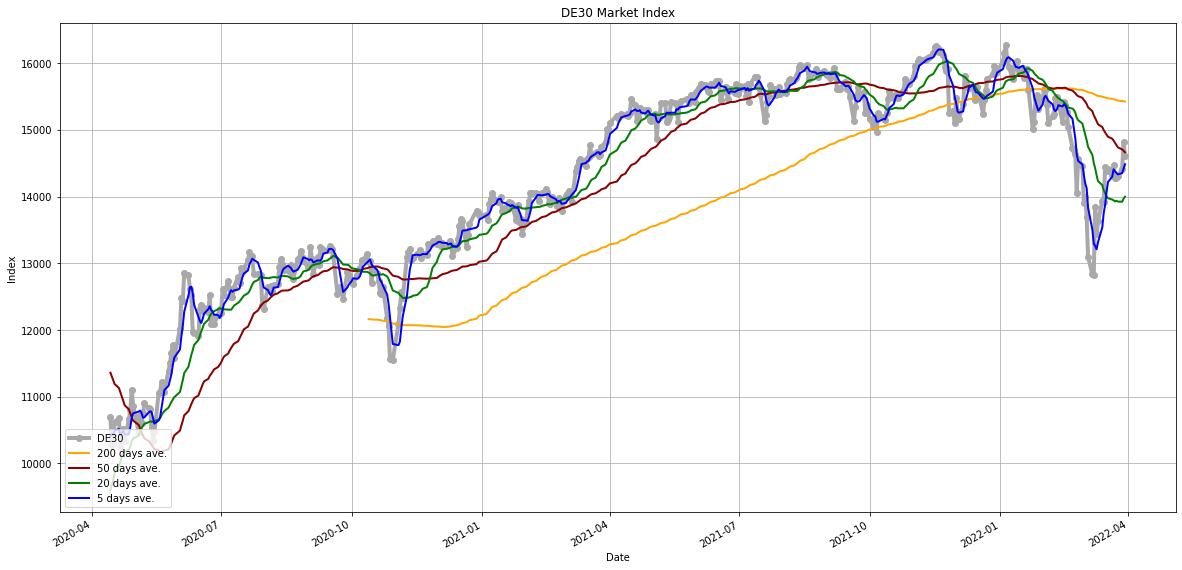



Displaying the data from  2020-01-02 00:00:00 to  2022-03-31 00:00:00 



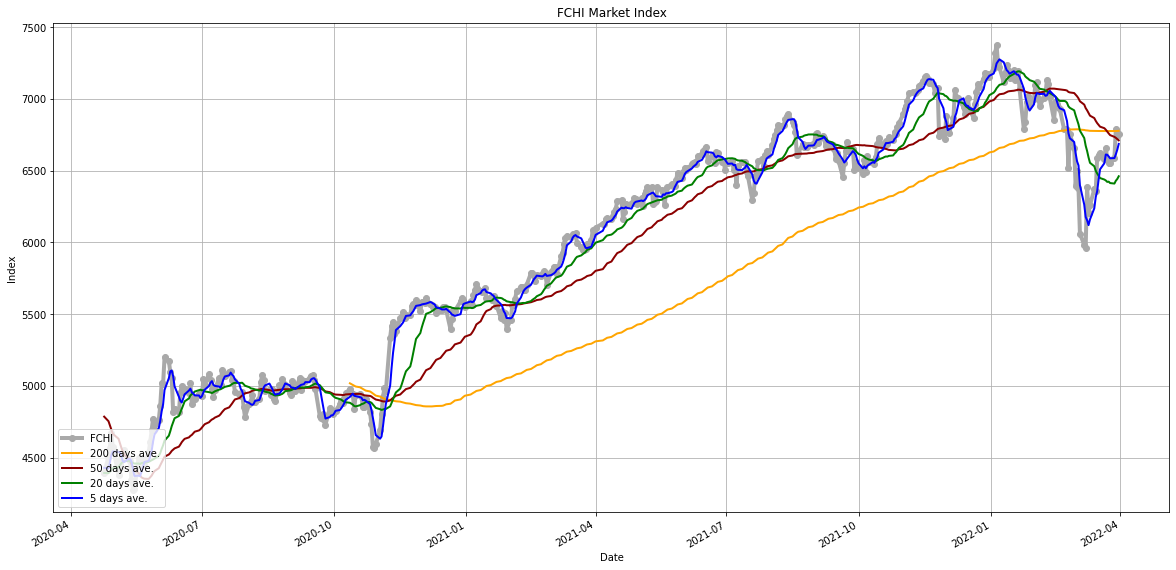



Displaying the data from  2020-01-02 00:00:00 to  2022-03-30 00:00:00 



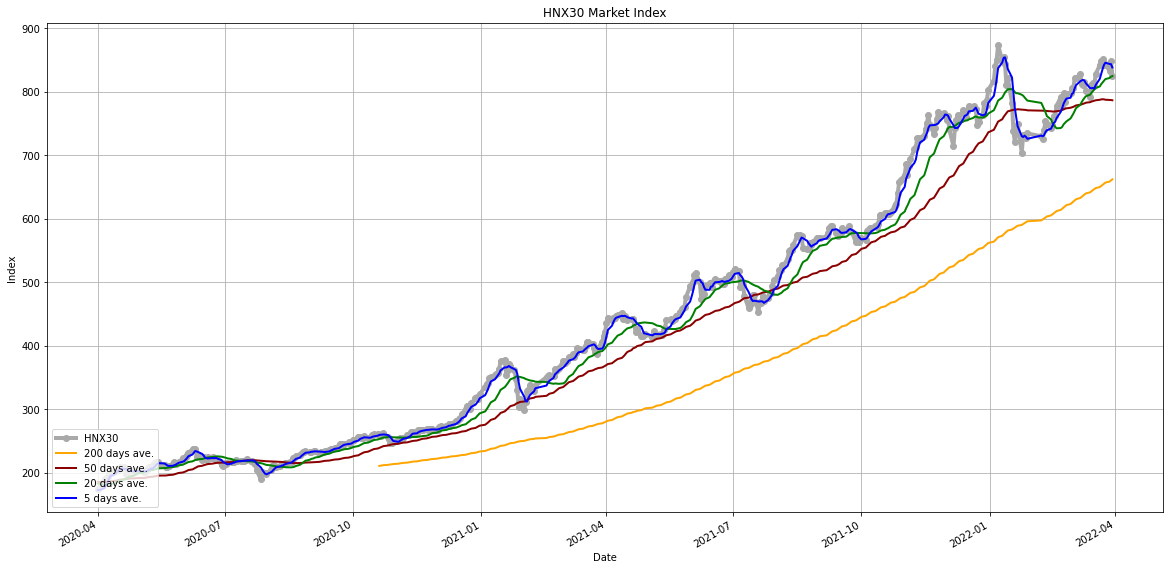

In [8]:
market_index_graphs('2020', 500, 'Market')
  

0 USD/KRW
1 CNY/KRW
2 JPY/KRW


Displaying the data from  2020-01-01 00:00:00 to  2022-03-31 00:00:00 



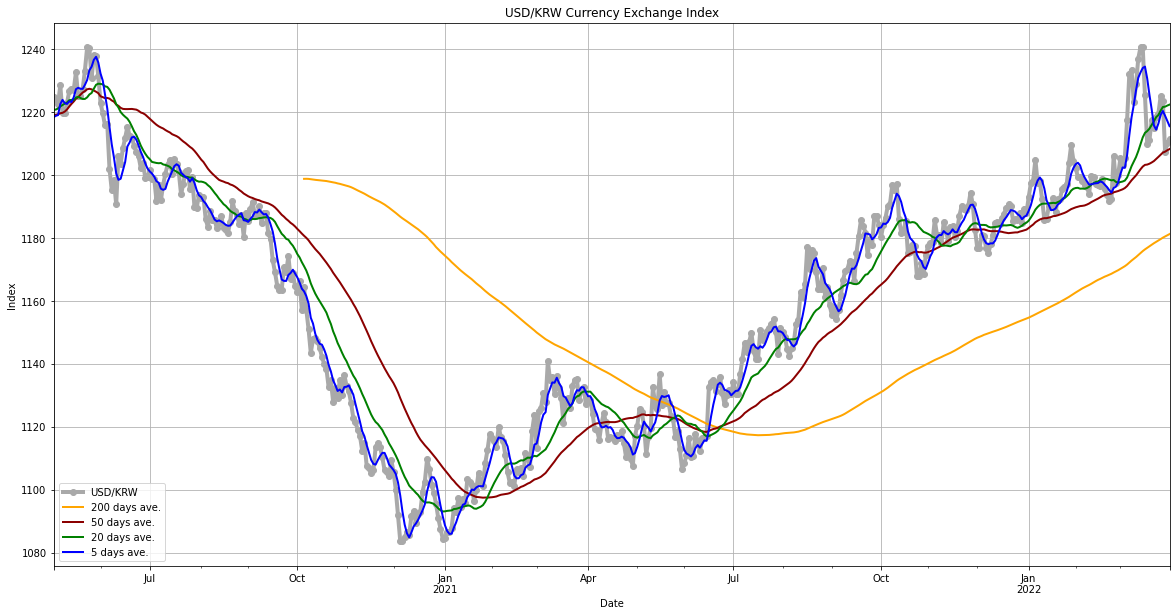



Displaying the data from  2020-01-01 00:00:00 to  2022-03-31 00:00:00 



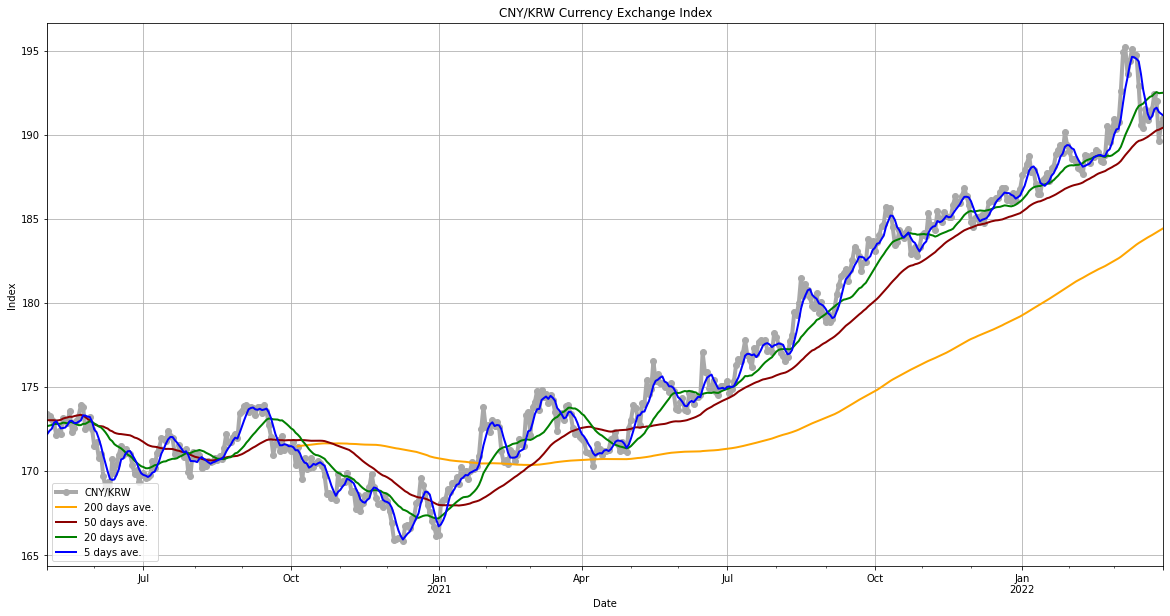



Displaying the data from  2020-01-01 00:00:00 to  2022-03-31 00:00:00 



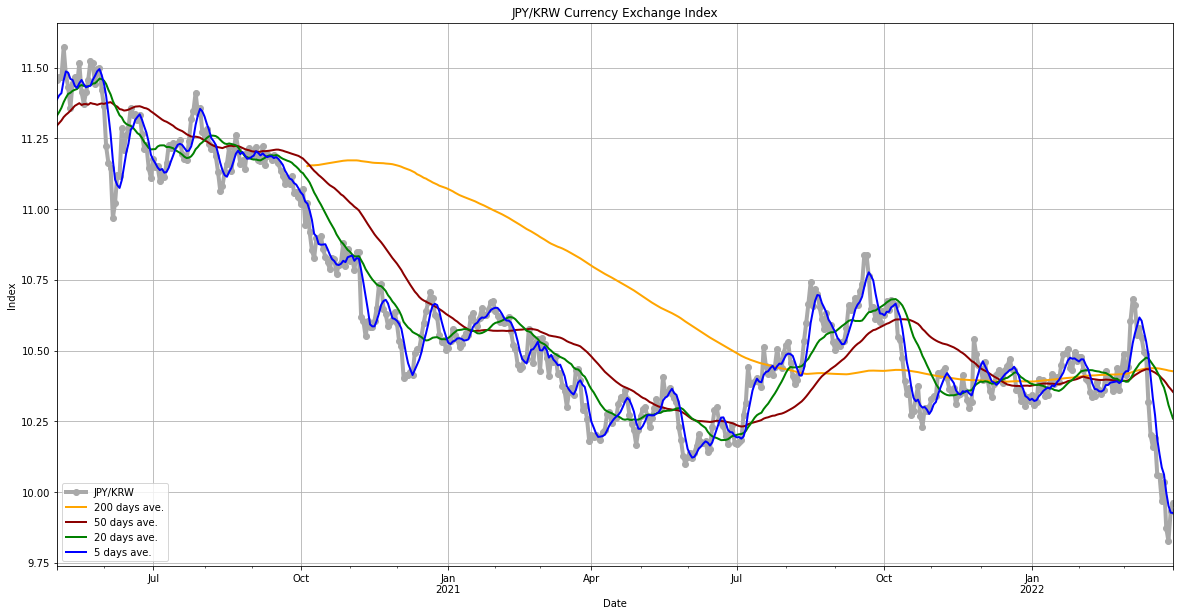

In [13]:
market_index_graphs('2020', 500, 'Currency Exchange')